# J/Psi + D meson plots

In [ ]:
import os
from tqdm import tqdm
import awkward as ak
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep

import numpy as np

plt.style.use(mplhep.style.CMS)

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

In [ ]:
#typ: data or mc
def create_plot1d(hist1d, lumi, log=False, ax=None, typ=None):
    
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea
    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    
    if typ == 'data':
        
        data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
        }
        ax = hist.plot1d(hist1d, error_opts=data_err_opts)
        
        # CMS style
    
        CMS = plt.text(0.03, 0.93, "CMS",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
        pre = plt.text(0.03, 0.88, "Preliminary",
                      fontsize=19,
                      fontstyle='italic',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
        lumi = plt.text(1., 1., r"" + lumi +  " fb$^{-1}$ (13 TeV)",
                    fontsize=18,
                    fontstyle='normal',
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )
        
        
    elif typ == 'mc':
        
        fill_opts = {
        'alpha': 0.8,
        'edgecolor':(0,0,0,.5)
        }
        
        ax = hist.plot1d(hist1d, fill_opts=fill_opts)
        
        # CMS format
        hfont = {'fontname':'Helvetica'}    
        plt.text(0.13, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure)
        plt.text(0.19, 0.89, "Simulation", fontdict=hfont, style='italic', transform=plt.gcf().transFigure)
        
    else:
        
        data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,}
        
            
        ax = hist.plot1d(hist1d, ax=ax)#, error_opts=data_err_opts)

   
    ax.legend().remove()
    
    return ax

In [ ]:
## Function to compare hists

def compare_data_mc(lumi, lb, hist_mc={}, hist_data=None, log=False, scale=None):


    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }

    # Data    
    if hist_data is None:
        print('No data histogram!')
    else:
        ax = hist.plot1d(
            hist_data,
            error_opts=data_err_opts,
            #stack=True,
        )
        
    for ht in hist_mc:
        fill_opts = {
        'alpha': 0.8,
        'edgecolor':(0,0,0,.5),
        'color' : hist_mc[ht],
        }
        
        
        #hist_scale_mc.scale(hist_mc[ht])
        ax = hist.plot1d(
            ht,
            fill_opts=fill_opts,
            stack=True,
        )
        
    
    leg = ax.legend()

    CMS = plt.text(0.05, 0.93, "CMS",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
    pre = plt.text(0.05, 0.88, "Preliminary",
                      fontsize=19,
                      fontstyle='italic',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
    lumi = plt.text(1., 1., lumi,
                    fontsize=18,
                    fontstyle='normal',
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )

    handles, labels = ax.get_legend_handles_labels()
    #labels = ['$Data$','$DPS$','$SPS$', 'Bc to jpsi mu mu']#'$B_c$ $\rightarrow$ $J/\psi$ $\mu\mu$']
    labels = lb
    ax.legend(handles, labels, prop={'size': 16})

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
  
        
    return ax

In [ ]:
def calc_weight_area(histogram):
    val = histogram.values()
    weight = 0
    try:
        for i in val[()]:
            weight = weight + i
    except:
        for i in val[(('right charge',))]:
            weight = weight + i
        
    return weight**-1

In [ ]:
def sum_accumulator(path):
    files = []
    with os.scandir(path) as aux:
        for file in aux:
            if file.name.endswith('.coffea') and (file.stat().st_size != 0):
                files.append(file.path)
    # Takes the first to start the accumulator
    acc = load(files[0])    
    # Take the length of the list
    le_files = len(files) 

    for i in tqdm(range(1, le_files), desc="Processing", unit="files"):
        # Suns the accumulator for each file

        acc += load(files[i])
    return acc

# Reading data

## No special cut (Last update: vtx0p05)

In [ ]:
import hist
from hist import Hist
import mplhep
mplhep.style.use("CMS")

In [ ]:
year='2017'
#data_file = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/{year}/Charmonium_{year}_vtx0p05.coffea'
data_file = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/{year}/Charmonium_{year}_sweight.coffea'

data_acc = load(data_file)
#data_file = '/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/data/2017/RunB/merged_data/trigger/vtx0p05/RunB_HLT_Dimuon25_vtx0p05_jpsi_pt_bin1_25_100_0.coffea'

#lumi='13.09'  #2016-pre-VFP
#lumi='13.26'  #2016-pos-VFP
lumi='41.48' #2017
#lumi='57.69' #2018

#dps_9to30_file = 'DPS/2017/9to30/DPS_vtx0p05.coffea'
#dps_30to50_file = 'DPS/2017/30to50/DPS_vtx0p05.coffea'
#dps_50to100_file = 'DPS/2017/50to100/DPS_vtx0p05.coffea'
#dps_100to150_file = 'DPS/2017/100to150/DPS_100to150.coffea'

#sps_25to150_file = 'SPS/2017/SPS_vtx0p05.coffea'

#background_bdtojpsiksphi = 'background/BdToJpsiKSPhi/data_BdToJpsiKSPhi_trigger.coffea'
save_path = f'/eos/user/m/mabarros/www/Analysis/Data_MC/{year}/'

In [ ]:
ht.plot1d(data_acc['JpsiDstar']['Dstar_deltamr'])

In [ ]:
#year='2017'
# Takes accumulator
path_dps_9to30 = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/data/{year}/dps_9to30/merged_data/'
dps_9to30_acc = sum_accumulator(path_dps_9to30)

path_dps_30to50 = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/data/{year}/dps_30to50/merged_data/'
dps_30to50_acc = sum_accumulator(path_dps_30to50)

path_dps_50to100 = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/data/{year}/dps_50to100/merged_data/'
dps_50to100_acc = sum_accumulator(path_dps_50to100)

In [ ]:
year='2017'
path_sps_9to30 = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/data/{year}/sps_9to30/merged_data/'
sps_9to30_acc = sum_accumulator(path_sps_9to30)

path_sps_30to50 = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/data/{year}/sps_30to50/merged_data/'
sps_30to50_acc = sum_accumulator(path_sps_30to50)

path_sps_50to100 = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/data/{year}/sps_50to100/merged_data/'
sps_50to100_acc = sum_accumulator(path_sps_50to100)

In [ ]:
year='2018'
background_bquark_jpsi_file = f'/afs/cern.ch/work/m/mabarros/public/CMSSW_10_6_12/src/analysis_data/analysis_fit/{year}/bquark_{year}_vtx0p05.coffea'
background_bquark_acc = load(background_bquark_jpsi_file)

In [ ]:
def stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc, nevt_data, typ, for_sum=None):
    
    if typ.startswith('Jpsi'):
        if for_sum is None:
            data_hist = data_acc['JpsiDstar'][typ]
            dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ]
            dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ]
            dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ]

            sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ]
            sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ]
            sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ]
            
            background_bquark_hist = background_bquark_acc['JpsiDstar'][typ]

        else:
            data_hist = data_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])

            sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            
            background_bquark_hist = background_bquark_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])

    elif typ.startswith('Dstar'):
        if for_sum is None:
            data_hist = data_acc['JpsiDstar'][typ].sum('chg')
            dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum('chg')
            dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum('chg')
            dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum('chg')

            sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum('chg')
            sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum('chg')
            sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum('chg')
            
            background_bquark_hist = background_bquark_acc['JpsiDstar'][typ].sum('chg')

        else:
            data_hist = data_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])

            sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            
            background_bquark_hist = background_bquark_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            
    nevts_dps_9to30 = np.sum(dps_9to30_hist.values()[()])
    nevts_dps_30to50 = np.sum(dps_30to50_hist.values()[()])
    nevts_dps_50to100 = np.sum(dps_50to100_hist.values()[()])

    nevts_sps_9to30 = np.sum(sps_9to30_hist.values()[()])
    nevts_sps_30to50 = np.sum(sps_30to50_hist.values()[()])
    nevts_sps_50to100 = np.sum(sps_50to100_hist.values()[()])
    
    nevts_background_bquark = np.sum(background_bquark_hist.values()[()])

    dps_9to30_hist.scale(nevt_data/nevts_dps_9to30)
    dps_30to50_hist.scale(nevt_data/nevts_dps_30to50)
    dps_50to100_hist.scale(nevt_data/nevts_dps_50to100)

    sps_9to30_hist.scale(nevt_data/nevts_sps_9to30)
    sps_30to50_hist.scale(nevt_data/nevts_sps_30to50)
    sps_50to100_hist.scale(nevt_data/nevts_sps_50to100)

    dps_hist = dps_9to30_hist + dps_30to50_hist + dps_50to100_hist
    sps_hist = sps_9to30_hist + sps_30to50_hist + sps_50to100_hist
    
    background_bquark_hist.scale(nevt_data/nevts_background_bquark)

    data_nhist = data_hist.to_hist()
    dps_nhist = dps_hist.to_hist()
    sps_nhist = sps_hist.to_hist()
    background_bquark_nhist = background_bquark_hist.to_hist()

    s = hist.Stack.from_dict({"DPS - Pythia8": dps_nhist, "SPS: 3FS + 4FS": sps_nhist, "b quark": background_bquark_nhist})

    #ax0 = dps_nhist.axes[0]
    #X= dps_nhist.axes.centers
    
    fig, ax = plt.subplots()
    
    s[::-1].plot(stack=True, histtype="fill")
    data_nhist.plot(histtype='errorbar', label='data', color='black')
    mplhep.cms.label('Preliminary', data=True, lumi=lumi, year=2017)
    plt.legend()
    
    '''if log == True:
        plt.yscale('log')
    #print(for_sum)
    
    if  for_sum[0] is not None:
        if 'eta' and 'phi' in for_sum:
            plt.savefig(typ + '_pt_stack.png')
                        
        elif 'pt' and 'phi' in for_sum:
            plt.savefig(typ + '_eta_stack.png')
                        
        elif 'pt' and 'eta' in for_sum: 
            plt.savefig(typ + '_phi_stack.png') 
    else:
        plt.savefig(typ + '_stack.png')'''
    
    
    return ax

In [ ]:
def stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, nevt_data, typ, for_sum=None):
    
    if typ.startswith('Jpsi'):
        if for_sum is None:
            data_hist = data_acc['JpsiDstar'][typ]
            dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ]
            dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ]
            dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ]

            sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ]
            sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ]
            sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ]

        else:
            data_hist = data_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])

            sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
            sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])

    elif typ.startswith('Dstar'):
        if for_sum is None:
            data_hist = data_acc['JpsiDstar'][typ].sum('chg')
            dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum('chg')
            dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum('chg')
            dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum('chg')

            sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum('chg')
            sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum('chg')
            sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum('chg')

        else:
            data_hist = data_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])

            sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
            
    nevts_dps_9to30 = np.sum(dps_9to30_hist.values()[()])
    nevts_dps_30to50 = np.sum(dps_30to50_hist.values()[()])
    nevts_dps_50to100 = np.sum(dps_50to100_hist.values()[()])

    nevts_sps_9to30 = np.sum(sps_9to30_hist.values()[()])
    nevts_sps_30to50 = np.sum(sps_30to50_hist.values()[()])
    nevts_sps_50to100 = np.sum(sps_50to100_hist.values()[()])

    dps_9to30_hist.scale(nevt_data/nevts_dps_9to30)
    dps_30to50_hist.scale(nevt_data/nevts_dps_30to50)
    dps_50to100_hist.scale(nevt_data/nevts_dps_50to100)

    sps_9to30_hist.scale(nevt_data/nevts_sps_9to30)
    sps_30to50_hist.scale(nevt_data/nevts_sps_30to50)
    sps_50to100_hist.scale(nevt_data/nevts_sps_50to100)

    dps_hist = dps_9to30_hist + dps_30to50_hist + dps_50to100_hist
    sps_hist = sps_9to30_hist + sps_30to50_hist + sps_50to100_hist

    data_nhist = data_hist.to_hist()
    dps_nhist = dps_hist.to_hist()
    sps_nhist = sps_hist.to_hist()

    s = hist.Stack.from_dict({"DPS - Pythia8": dps_nhist, "SPS: 3FS + 4FS": sps_nhist})

    #ax0 = dps_nhist.axes[0]
    #X= dps_nhist.axes.centers
    
    fig, ax = plt.subplots()
    
    s[::-1].plot(stack=True, histtype="fill")
    data_nhist.plot(histtype='errorbar', label='data', color='black')
    mplhep.cms.label('Preliminary', data=True, lumi=lumi, year=2017)
    plt.legend()
    
    '''if log == True:
        plt.yscale('log')
    #print(for_sum)
    
    if  for_sum[0] is not None:
        if 'eta' and 'phi' in for_sum:
            plt.savefig(typ + '_pt_stack.png')
                        
        elif 'pt' and 'phi' in for_sum:
            plt.savefig(typ + '_eta_stack.png')
                        
        elif 'pt' and 'eta' in for_sum: 
            plt.savefig(typ + '_phi_stack.png') 
    else:
        plt.savefig(typ + '_stack.png')'''
    
    
    return ax

In [ ]:
#nevt_data = 2321 # 2016-pre-VFP
#nevt_data = 1993 # 2016-pos-VFP
nevt_data = 4919.58#4950 # 2017
#nevt_data = 6989 # 2018

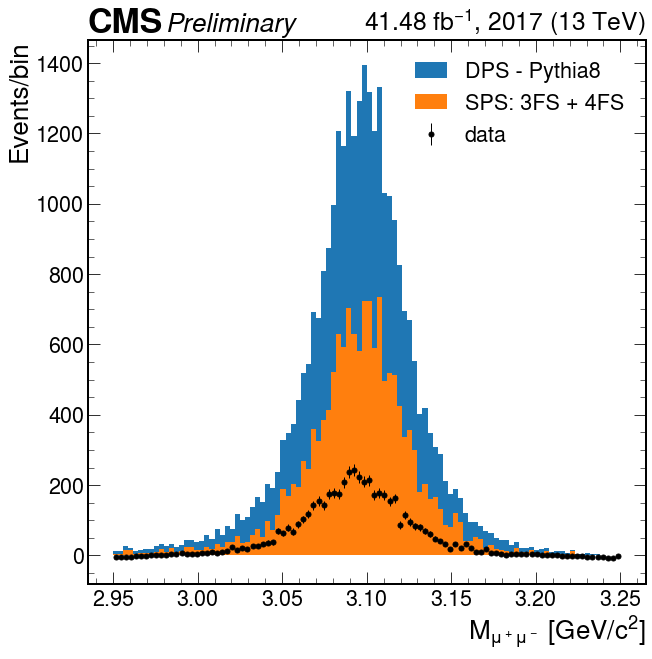

In [21]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc,# background_bquark_acc,
            nevt_data, 
            typ='Jpsi_mass', 
            for_sum=None)
ax.set_ylabel('Events/bin')
plt.savefig(f'Jpsi_mass_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Jpsi_p', 
            for_sum=['eta', 'phi'])
plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Jpsi_pt_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Jpsi_p', 
            for_sum=['pt', 'phi'])
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Jpsi_eta_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Jpsi_p', 
            for_sum=['pt', 'eta'])
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Jpsi_phi_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Jpsi_rap', 
            for_sum=None)
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Jpsi_rap_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc,# background_bquark_acc,
            nevt_data, 
            typ='Jpsi_dl',
            for_sum=None)
plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Jpsi_dl_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Dstar_deltamr',
            for_sum=None)
#plt.yscale('log')
ax.set_ylabel('Events/bin')
ax.set_xlabel(r'M$_{k\pi\pi}$ - M$_{k\pi}$ [GeV/c$^2$]')
plt.savefig(f'Dstar_deltamr_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Dstar_p',
            for_sum=['eta', 'phi'])
plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Dstar_pt_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Dstar_p',
            for_sum=['pt', 'phi'])
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Dstar_eta_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Dstar_p',
            for_sum=['pt', 'eta'])
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Dstar_phi_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='Dstar_rap',
            for_sum=None)
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'Dstar_rap_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='JpsiDstar_mass',
            for_sum=None)
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'JpsiDstar_mass_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ='JpsiDstar_deltarap',
            for_sum=None)
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'JpsiDstar_deltarap_stack_{year}.png')
plt.show()

In [ ]:
ax = stack_histo(data_acc, dps_9to30_acc, dps_30to50_acc, dps_50to100_acc, sps_9to30_acc, sps_30to50_acc, sps_50to100_acc, background_bquark_acc,
            nevt_data, 
            typ=f'JpsiDstar_deltaphi',
            for_sum=None)
#plt.yscale('log')
ax.set_ylabel('Events/bin')
plt.savefig(f'JpsiDstar_deltaphi_stack_{year}.png')
plt.show()

In [ ]:
'eta' in None

In [ ]:
typ = 'Jpsi_p'
for_sum= ['eta', 'phi']
#for_sum = None
data_acc = load(data_file)

nevt_data = 4950

dps_9to30_acc = dps_9to30_file
dps_30to50_acc = dps_30to50_file
dps_50to100_acc = dps_50to100_file

sps_9to30_acc = sps_9to30_file
sps_30to50_acc = sps_30to50_file
sps_50to100_acc = sps_50to100_file



In [ ]:
if typ.startswith('Jpsi'):
    if for_sum is None:
        data_hist = data_acc['JpsiDstar'][typ]
        dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ]
        dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ]
        dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ]

        sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ]
        sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ]
        sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ]
        
    else:
        data_hist = data_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
        dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
        dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
        dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])

        sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
        sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
        sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum(for_sum[0], for_sum[1])
        
elif typ.startswith('Dstar'):
    if for_sum is None:
        data_hist = data_acc['JpsiDstar'][typ].sum('chg')
        dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum('chg')
        dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum('chg')
        dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum('chg')

        sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum('chg')
        sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum('chg')
        sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum('chg')
        
    else:
        data_hist = data_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
        dps_9to30_hist = dps_9to30_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
        dps_30to50_hist = dps_30to50_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
        dps_50to100_hist = dps_50to100_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])

        sps_9to30_hist = sps_9to30_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
        sps_30to50_hist = sps_30to50_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])
        sps_50to100_hist = sps_50to100_acc['JpsiDstar'][typ].sum('chg', for_sum[0], for_sum[1])

In [ ]:
nevts_dps_9to30 = np.sum(dps_9to30_hist.values()[()])
nevts_dps_30to50 = np.sum(dps_30to50_hist.values()[()])
nevts_dps_50to100 = np.sum(dps_50to100_hist.values()[()])

nevts_sps_9to30 = np.sum(sps_9to30_hist.values()[()])
nevts_sps_30to50 = np.sum(sps_30to50_hist.values()[()])
nevts_sps_50to100 = np.sum(sps_50to100_hist.values()[()])

dps_9to30_hist.scale(nevt_data/nevts_dps_9to30)
dps_30to50_hist.scale(nevt_data/nevts_dps_30to50)
dps_50to100_hist.scale(nevt_data/nevts_dps_50to100)

sps_9to30_hist.scale(nevt_data/nevts_sps_9to30)
sps_30to50_hist.scale(nevt_data/nevts_sps_30to50)
sps_50to100_hist.scale(nevt_data/nevts_sps_50to100)

dps_hist = dps_9to30_hist + dps_30to50_hist + dps_50to100_hist
sps_hist = sps_9to30_hist + sps_30to50_hist + sps_50to100_hist

In [ ]:
data_nhist = data_hist.to_hist()
dps_nhist = dps_hist.to_hist()
sps_nhist = sps_hist.to_hist()

In [ ]:
s[::-1].plot(stack=True, histtype="fill")
data_nhist.plot(histtype='errorbar', label='data', color='black')
mplhep.cms.label('Preliminary', data=True, lumi=41.48, year=2017)
plt.legend()
plt.yscale('log')
#plt.savefig(typ + '_stack.png')
plt.show()

## 

## decay length < 0.06 mm (Stefanos)

In [ ]:
data_file = '2017/Charmonium_2017_dl0p06.coffea'
lumi='41.48 fb$^{-1}$'

dps_9to30_file = 'DPS/9to30/DPS_9to30_dl0p06.coffea'
dps_30to50_file = 'DPS/30to50/DPS_30to50_dl0p06.coffea'
dps_50to100_file = 'DPS/50to100/DPS_50to100_dl0p06.coffea'
dps_100to150_file = 'DPS/100to150/DPS_100to150_dl0p06.coffea'

sps_25to150_file = 'SPS/SPS_dl0p06.coffea'

background_bquark_jpsi_file = 'bquark/bquark_dl0p06.coffea'
#background_bdtojpsiksphi = 'background/BdToJpsiKSPhi/data_BdToJpsiKSPhi_trigger.coffea'

## vtxProb > 0.1 and decay length < 0.06 mm (Stefanos)

In [ ]:
data_file = '2017/Charmonium_2017_dl0p06vtxprob0p1.coffea'
lumi='41.48 fb$^{-1}$'

dps_9to30_file = 'DPS/9to30/DPS_9to30_dl0p06vtxprob0p1.coffea'
dps_30to50_file = 'DPS/30to50/DPS_30to50_dl0p06vtxprob0p1.coffea'
dps_50to100_file = 'DPS/50to100/DPS_50to100_dl0p06vtxprob0p1.coffea'
dps_100to150_file = 'DPS/100to150/DPS_100to150_dl0p06vtxprob0p1.coffea'

sps_25to150_file = 'SPS/SPS_dl0p06vtxprob0p1.coffea'

background_bquark_jpsi_file = 'bquark/bquark_dl0p06vtxprob0p1.coffea'
#background_bdtojpsiksphi = 'background/BdToJpsiKSPhi/data_BdToJpsiKSPhi_trigger.coffea'

# Associated Particles

# Comparison Monte Carlo With data

## Weights

### DPS 9 to 30 GeV

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_9to30 = 494*1e-12
Nevts_9to30=4895376 
Weight_dps_9to30=luminosity*xsec_9to30/Nevts_9to30
Weight_dps_9to30

### DPS 30 to 50 GeV

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_30to50 = 0.29*1e-12
Nevts_30to50=1095994 
Weight_dps_30to50=luminosity*xsec_30to50/Nevts_30to50
Weight_dps_30to50

### DPS 50 to 100 GeV

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_50to100 = 0.0015398*1e-12
Nevts_50to100=477085 
Weight_dps_50to100=luminosity*xsec_50to100/Nevts_50to100
Weight_dps_50to100

### DPS 100 to 150 GeV

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_100to150 = 0.0000028404*1e-12
Nevts_100to150=681385 
Weight_dps_100to150=luminosity*xsec_100to150/Nevts_100to150
Weight_dps_100to150

### SPS

In [ ]:
luminosity = 41.53/10**(-15)  
xsec_sps = 1.525e-01*1e-12
#xsec_sps = 23.88*1e-12
Nevts_sps = 110665
Weight_sps = luminosity*xsec_sps/Nevts_sps
Weight_sps

### b-quark to jpsi (NEW)

In [ ]:
luminosity = 41.53/10**(-15) 
xsec_bjpsi = 130000*1e-12
Nevts_bjpsi = 65768289
Weight_bjpsi = luminosity*xsec_bjpsi/Nevts_bjpsi
#Weight_bjpsi = luminosity_bjpsi/Nevts_bjpsi/xsec_bjpsi
Weight_bjpsi

In [ ]:
# Bs to jpsi Ks phi (NEW)
luminosity = 41.53/10**(-15) 
xsec_bdtojpsiksphi = 14675760*1e-12
Nevts_bdtojpsiksphi = 976383
Weight_bdtojpsiksphi = luminosity*xsec_bdtojpsiksphi/Nevts_bdtojpsiksphi
Weight_bdtojpsiksphi 

In [ ]:
data_acc = load(data_file)
data = data_acc['JpsiDstar']['Jpsi_p'].sum('eta','phi')
weight_data = calc_weight_area(data)
data.scale(weight_data)

sps_9to30 = sps_9to30_file['JpsiDstar']['Jpsi_p'].sum('eta','phi')
sps_9to30.scale(calc_weight_area(sps_9to30)*0.5) 

sps_30to50 = sps_30to50_file['JpsiDstar']['Jpsi_p'].sum('eta','phi')
sps_30to50.scale(calc_weight_area(sps_30to50)*0.5)

sps_50to100 = sps_50to100_file['JpsiDstar']['Jpsi_p'].sum('eta','phi')
sps_50to100.scale(calc_weight_area(sps_50to100)*0.1)

dps_9to30 = dps_9to30_file['JpsiDstar']['Jpsi_p'].sum('eta','phi')
dps_9to30.scale(calc_weight_area(dps_9to30)*0.52) 

dps_30to50 = dps_30to50_file['JpsiDstar']['Jpsi_p'].sum('eta','phi')
dps_30to50.scale(calc_weight_area(dps_30to50)*0.52)

dps_50to100 = dps_50to100_file['JpsiDstar']['Jpsi_p'].sum('eta','phi')
dps_50to100.scale(calc_weight_area(dps_50to100)*0.12)

In [ ]:
lb = ['sps', 'sps', 'sps', 'dps', 'dps', 'dps', 'data']
ax = compare_data_mc(lumi, lb, hist_mc={dps_9to30: 'r', dps_30to50: 'r', dps_50to100: 'r', sps_9to30: 'g', sps_30to50: 'g', sps_50to100: 'g', }, hist_data=data, log=False, scale=None)
ax.set_yscale('log')
ax.set_ylim(0, 0.8)
plt.savefig(save_path + 'Jpsi_pt.png')

In [ ]:
data_acc = load(data_file)
data = data_acc['JpsiDstar']['Jpsi_p'].sum('eta','phi')
weight_data = calc_weight_area(data)
data.scale(weight_data)

sps_9to30 = sps_9to30_file['JpsiDstar']['Jpsi_p'].sum('eta','phi')
weight_sps_9to30 = calc_weight_area(sps_9to30)
sps_9to30.scale(weight_sps_9to30)

dps_9to30 = dps_9to30_file['JpsiDstar']['Jpsi_p'].sum('eta','phi') 
weight_dps_9to30 = calc_weight_area(dps_9to30)
dps_9to30.scale(weight_dps_9to30)

In [ ]:
lb = ['sps', 'dps', 'data']
ax = compare_data_mc(lumi, lb, hist_mc={sps_9to30: 'r', dps_9to30: 'g'}, hist_data=data, log=False, scale=None)
ax.set_ylim(0, 0.1)
plt.savefig(save_path + 'Jpsi_pt_all_area.png')    

In [ ]:
import functools
import operator

In [ ]:
areas_data = functools.reduce(operator.mul, data.to_hist().axes.widths)

In [ ]:
density_data = data.to_hist().values() / data.to_hist().sum() / areas

In [ ]:
data_hist = data.to_hist()

In [ ]:
data_hist.plot1d()

In [ ]:
fig, ax = plt.subplots()


In [ ]:
sps_25to150_file = 'SPS/2017/SPS_vtx0p05.coffea'
sps_25to150_file = load(sps_25to150_file)

In [ ]:
ax = create_plot1d(sps_9to30_file['JpsiDstar']['JpsiDstar_mass'],)

In [ ]:
ax = create_plot1d(sps_9to30_file['JpsiDstar']['Jpsi_p'].sum('eta','phi'),)
#ax.set_xlim(20, 70)

In [ ]:
create_plot1d(dps_50to100_file['JpsiDstar']['Jpsi_p'].sum('eta','phi'),)

In [ ]:
create_plot1d(sps_9to30_file['JpsiDstar']['JpsiDstar_mass']+sps_30to50_file['JpsiDstar']['JpsiDstar_mass']+sps_50to100_file['JpsiDstar']['JpsiDstar_mass'],)

In [ ]:
lumi='mc'
lb = ['sps_9to30', 'sps_30to50', 'sps_50to100']
hist_mc={sps_9to30_file['JpsiDstar']['Jpsi_p'].sum('eta', 'phi') : 'r', sps_30to50_file['JpsiDstar']['Jpsi_p'].sum('eta', 'phi') : 'g' , sps_50to100_file['JpsiDstar']['Jpsi_p'].sum('eta', 'phi') : 'b' }

In [ ]:
ax = compare_data_mc(lumi=lumi, lb=lb, hist_mc=hist_mc, hist_data=None, log=False, scale=None)
ax.set_ylim(0, 1000)

In [ ]:
#def create_hist_plot(data_file, dps_9to30, dps_30to50, dps_50to100, dps_100to150, sps_9to30, bquark_jpsi, typ, area=False):
def create_hist_plot(data_file, dps_9to30, dps_30to50, dps_50to100, sps_9to30, sps_30to50, sps_50to100, bquark_jpsi, typ, area=False, for_sum=None):

    data = load(data_file)
    
    dps_9to30 = dps_9to30_file   
    dps_30to50 = dps_30to50_file    
    dps_50to100 = dps_50to100_file
    
    sps_9to30 = sps_9to30_file
    sps_30to50 = sps_30to50_file    
    sps_50to100 = sps_50to100_file

    bquark_jpsi = load(background_bquark_jpsi_file)
    
    hist_data = data['JpsiDstar'][typ]

    hist_dps_9to30 = dps_9to30['JpsiDstar'][typ]
    hist_dps_30to50 = dps_30to50['JpsiDstar'][typ]
    hist_dps_50to100 = dps_50to100['JpsiDstar'][typ]
    
    hist_sps_9to30 = sps_9to30['JpsiDstar'][typ]
    hist_sps_30to50 = sps_30to50['JpsiDstar'][typ]
    hist_sps_50to100 = sps_50to100['JpsiDstar'][typ]
    
    hist_bquark_jpsi = bquark_jpsi['JpsiDstar'][typ]
      
    # Takes the number of events in data
    nevt_data = 4950 # Taken from the fit
    # Takes the numbef of events in Monte Carlo
    #dps_9to30['JpsiDstar']['Dstar_deltamr']['right charge'].values()[('right charge',)]
    #dps_9to30['JpsiDstar']['Jpsi_mass'].values()[()]
    
    if typ.startswith('Dstar'):
        nevts_dps9to30 = np.sum(dps_9to30['JpsiDstar'][typ].values()[('right charge',)])
        nevts_dps30to50 = np.sum(dps_30to50['JpsiDstar'][typ].values()[('right charge',)])
        nevts_dps50to100 = np.sum(dps_50to100['JpsiDstar'][typ].values()[('right charge',)])
        
        nevts_sps9to30 = np.sum(sps_9to30['JpsiDstar'][typ].values()[('right charge',)])
        nevts_sps30to50 = np.sum(sps_30to50['JpsiDstar'][typ].values()[('right charge',)])
        nevts_sps50to100 = np.sum(sps_50to100['JpsiDstar'][typ].values()[('right charge',)])
        
        nevts_sps = np.sum(sps_9to30['JpsiDstar'][typ].values()[('right charge',)])
        nevts_bquark_jpsi = np.sum(bquark_jpsi['JpsiDstar'][typ].values()[('right charge',)])

    elif typ.startswith('Jpsi'):
        nevts_dps9to30 = np.sum(dps_9to30['JpsiDstar'][typ].values()[()])
        nevts_dps30to50 = np.sum(dps_30to50['JpsiDstar'][typ].values()[()])
        nevts_dps50to100 = np.sum(dps_50to100['JpsiDstar'][typ].values()[()])
        
        nevts_sps9to30 = np.sum(sps_9to30['JpsiDstar'][typ].values()[()])
        nevts_sps30to50 = np.sum(sps_30to50['JpsiDstar'][typ].values()[()])
        nevts_sps50to100 = np.sum(sps_50to100['JpsiDstar'][typ].values()[()])

        nevts_sps = np.sum(sps_9to30['JpsiDstar'][typ].values()[()])
        nevts_bquark_jpsi = np.sum(bquark_jpsi['JpsiDstar'][typ].values()[()])
    
    
    if area:
        if for_sum is None:
            
            Weight_data = calc_weight_area(hist_data)
            hist_data.scale(Weight_data)
            
            hist_dps = hist_dps_9to30 + hist_dps_30to50 + hist_dps_50to100
            Weight_dps = calc_weight_area(hist_dps)
            hist_dps.scale(Weight_dps)
            
            hist_sps = hist_sps_9to30 + hist_sps_30to50 + hist_sps_50to100
            Weight_sps = calc_weight_area(hist_sps)
            hist_sps.scale(Weight_sps)

            Weight_bjpsi = calc_weight_area(hist_bquark_jpsi)
            hist_bquark_jpsi.scale(nevt_data/nevts_bquark_jpsi)
        else:
            
            hist_data = hist_data.sum(for_sum[0], for_sum[1])
            Weight_data = calc_weight_area(hist_data)
            hist_data.scale(Weight_data)
            
            hist_dps = hist_dps_9to30 + hist_dps_30to50 + hist_dps_50to100
            hist_dps = hist_dps.sum(for_sum[0], for_sum[1])
            Weight_dps = calc_weight_area(hist_dps)
            hist_dps.scale(Weight_dps)
            
            hist_sps = hist_sps_9to30 + hist_sps_30to50 + hist_sps_50to100
            hist_sps = hist_sps.sum(for_sum[0], for_sum[1])
            Weight_sps = calc_weight_area(hist_sps)
            hist_sps.scale(Weight_sps)
            
            hist_bquark_jpsi = hist_bquark_jpsi.sum(for_sum[0], for_sum[1])
            Weight_bquark_jpsi = calc_weight_area(hist_bquark_jpsi)
            hist_bquark_jpsi.scale(Weight_bquark_jpsi)
            
        
    else:

        hist_dps_9to30.scale(nevt_data/nevts_dps9to30)    
        hist_dps_30to50.scale(nevt_data/nevts_dps30to50)    
        hist_dps_50to100.scale(nevt_data/nevts_dps50to100)
        hist_dps = hist_dps_9to30 + hist_dps_30to50 + hist_dps_50to100

        hist_sps_9to30.scale(nevt_data/nevts_sps9to30)    
        hist_sps_30to50.scale(nevt_data/nevts_sps30to50)    
        hist_sps_50to100.scale(nevt_data/nevts_sps50to100)
        hist_sps = hist_sps_9to30 + hist_sps_30to50 + hist_sps_50to100

        hist_bquark_jpsi.scale(nevt_data/nevts_bquark_jpsi)
    
        
    return hist_data, hist_dps, hist_sps, hist_bquark_jpsi, hist_dps+hist_sps+hist_bquark_jpsi

In [ ]:
dps_9to30 = dps_9to30_file

In [ ]:
dps_30to50 = dps_30to50_file

In [ ]:
hist_dps_9to30 = dps_9to30['JpsiDstar']['JpsiDstar_mass']

In [ ]:
hist_dps_30to50 = dps_30to50['JpsiDstar']['JpsiDstar_mass']

In [ ]:
dps_30to50['JpsiDstar']

In [ ]:
hist.plot1d(dps_9to30['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
hist.plot1d(dps_30to50['JpsiDstar']['JpsiDstar_deltarap'])

## Variable: J/$\psi$D$^*$ invariant mass

In [ ]:
hist_data_invmass, hist_dps_invmass, hist_sps_invmass, hist_bquark_jpsi_invmass, total = create_hist_plot(data_file, 
                                                                                                   dps_9to30_file, 
                                                                                                   dps_30to50_file, 
                                                                                                   dps_50to100_file,
                                                                                                   sps_9to30_file, 
                                                                                                   sps_30to50_file, 
                                                                                                   sps_50to100_file,
                                                                                                   background_bquark_jpsi_file,
                                                                                                   typ='JpsiDstar_mass',
                                                                                                   area=True) #, Data, DPS, bquark, SPS
hist_mc_invmass={hist_dps_invmass:'r',
                 #hist_bquark_jpsi_invmass: 'b',
                 hist_sps_invmass: 'g',
                 }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_invmass,
                     hist_data=hist_data_invmass,)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 3e3)
ax.set_ylim(0, 0.3)
plt.savefig(save_path + 'JpsiDstar_invmass.png')

In [ ]:
hist_mc_invmass={total:'r',
                 }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',] labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_invmass,
                     hist_data=hist_data_invmass,)
ax.set_ylabel('Events/area')
ax.set_ylim(0, 3e3)
plt.savefig(save_path + 'JpsiDstar_invmass_allMC.png')

## Variable: J/$\psi$D$^*$ pt

In [ ]:
hist_data_ptobj, hist_dps_ptobj, hist_sps_ptobj, hist_bquark_jpsi_ptobj, total_ptobj = create_hist_plot(data_file, 
                                                                                           dps_9to30_file, 
                                                                                           dps_30to50_file, 
                                                                                           dps_50to100_file,
                                                                                           sps_9to30_file, 
                                                                                           sps_30to50_file, 
                                                                                           sps_50to100_file,
                                                                                           background_bquark_jpsi_file,
                                                                                           typ='JpsiDstar_pt',
                                                                                           area=True)

hist_mc_ptobj={hist_dps_ptobj:'r',
               #hist_bquark_jpsi_ptobj: 'b',
                hist_sps_ptobj: 'g',
               }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_ptobj,
                     hist_data=hist_data_ptobj,)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 9e3)
plt.savefig(save_path + 'JpsiDstar_pt.png')

In [ ]:
hist_mc_ptobj={total_ptobj:'r',
                 }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',] 
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_ptobj,
                     hist_data=hist_data_ptobj,)
ax.set_ylabel('Events/area')
ax.set_ylim(0, 3e3)
plt.savefig(save_path + 'JpsiDstar_pt_allMC.png')

## Variable: $\Delta$y

In [ ]:
hist_data_deltarap, hist_dps_deltarap, hist_sps_deltarap, hist_bquark_jpsi_deltarap, total_deltarap = create_hist_plot(data_file, 
                                                                                                       dps_9to30_file, 
                                                                                                       dps_30to50_file, 
                                                                                                       dps_50to100_file,
                                                                                                       sps_9to30_file, 
                                                                                                       sps_30to50_file, 
                                                                                                       sps_50to100_file,
                                                                                                       background_bquark_jpsi_file,
                                                                                                       typ='JpsiDstar_deltarap',
                                                                                                       area=True )

hist_mc_deltarap={hist_dps_deltarap:'r',
                  #hist_bquark_jpsi_deltarap: 'b',
                  hist_sps_deltarap: 'g',
                  }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_deltarap,
                     hist_data=hist_data_deltarap,)
ax.set_ylabel('Events/area')
#ax.set_xlim(-6, 6)
#ax.set_ylim(0, 1.1e4)
plt.savefig(save_path + 'JpsiDstar_deltay.png')

In [ ]:
hist_mc_ptobj={total_ptobj:'r',
                 }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_ptobj,
                     hist_data=hist_data_ptobj,)
ax.set_ylabel('Events/area')
ax.set_ylim(0, 3e3)
plt.savefig(save_path + 'JpsiDstar_pt_allMC.png')

## Variable: $\Delta$$\phi$

In [ ]:
hist_data_deltaphi, hist_dps_deltaphi, hist_sps_deltaphi, hist_bquark_jpsi_deltaphi, total = create_hist_plot(data_file, 
                                                                                                       dps_9to30_file, 
                                                                                                       dps_30to50_file, 
                                                                                                       dps_50to100_file,
                                                                                                       sps_9to30_file, 
                                                                                                       sps_30to50_file, 
                                                                                                       sps_50to100_file, 
                                                                                                       background_bquark_jpsi_file,
                                                                                                       typ='JpsiDstar_deltaphi',
                                                                                                       area=True)

hist_mc_deltaphi={hist_dps_deltaphi:'r',
                  #hist_bquark_jpsi_deltaphi: 'b',
                  hist_sps_deltaphi: 'g',
                  }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_deltaphi,
                     hist_data=hist_data_deltaphi,)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 0.9e4)
plt.savefig(save_path + 'JpsiDstar_deltaphi.png')

## Variable: J/$\psi$ decay length [mm]

In [ ]:
hist_data_dl, hist_dps_dl, hist_sps_dl, hist_bquark_jpsi_dl, total = create_hist_plot(data_file, 
                                                     
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file,
                                                                               sps_9to30_file, 
                                                                               sps_30to50_file, 
                                                                               sps_50to100_file,
                                                                               background_bquark_jpsi_file,
                                                                               typ='Jpsi_dl',
                                                                               area=True)

hist_mc_dl={hist_dps_dl:'r',
            #hist_bquark_jpsi_dl: 'b',
            hist_sps_dl: 'g',
            }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_dl,
                     hist_data=hist_data_dl,
                     log=False)
ax.set_ylabel('Events/area')
ax.set_xlabel('J/$\psi$ dl [mm].')
#ax.set_ylim(0, 5e4)
plt.savefig(save_path + 'Jpsi_decay_length.png')
ax.set_yscale('log')
ax.set_ylim(0, 0.5)

## Variable: J/$\psi$ decay length significance

In [ ]:
hist_data_dlSig, hist_dps_dlSig, hist_sps_dlSig, hist_bquark_jpsi_dlSig, total = create_hist_plot(data_file, 
                                                                                                       dps_9to30_file, 
                                                                                                       dps_30to50_file, 
                                                                                                       dps_50to100_file,
                                                                                                       sps_9to30_file, 
                                                                                                       sps_30to50_file, 
                                                                                                       sps_50to100_file, 
                                                                                                       background_bquark_jpsi_file,
                                                                                                       typ='Jpsi_dlSig',
                                                                                                       area=True)

hist_mc_dlSig={hist_dps_dlSig:'r',
                 hist_sps_dlSig: 'g',
                 #hist_bquark_jpsi_dlSig: 'b'}
              }
#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_dlSig,
                     hist_data=hist_data_dlSig,)
ax.set_ylabel('Events/area')
ax.set_xlabel('J/$\psi$ dl. sig.')
plt.savefig(save_path + 'Jpsi_decay_length_significance.png')

## Variable: J/$\psi$ mass

In [ ]:
hist_data_mass, hist_dps_mass, hist_sps_mass, hist_bquark_jpsi_mass, total = create_hist_plot(data_file, 
                                                                                       dps_9to30_file, 
                                                                                       dps_30to50_file, 
                                                                                       dps_50to100_file,
                                                                                       sps_9to30_file, 
                                                                                       sps_30to50_file, 
                                                                                       sps_50to100_file, 
                                                                                       background_bquark_jpsi_file,
                                                                                       typ='Jpsi_mass',
                                                                                       area=True)

hist_mc_mass ={hist_dps_mass: 'r',
               #hist_bquark_jpsi_mass: 'b',
               hist_sps_mass: 'g',
               }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_mass,
                     hist_data=hist_data_mass)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 4e3)
plt.savefig(save_path + 'Jpsi_mass.png')

In [ ]:
hist_mc_mass={total:'r',
                 }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_mass,
                     hist_data=hist_data_mass,)
ax.set_ylabel('Events/area')
ax.set_ylim(0, 1.5e3)
plt.savefig(save_path + 'Jpsi_mass_all.png')

## Variable: J/$\psi$ p$_T$

In [ ]:
hist_data_pt, hist_dps_pt, hist_sps_pt, hist_bquark_jpsi_pt, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file,
                                                                               sps_9to30_file, 
                                                                               sps_30to50_file, 
                                                                               sps_50to100_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Jpsi_p',
                                                                               area=True,
                                                                               for_sum = ['eta', 'phi'])

hist_mc_pt ={hist_dps_pt: 'r',
             #hist_bquark_jpsi_pt.sum('eta', 'phi'): 'b',
             hist_sps_pt: 'g',
             }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_pt,
                     hist_data=hist_data_pt, log=False)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 15e3)
plt.savefig(save_path + 'Jpsi_pt.png')
ax.set_yscale('log')
ax.set_ylim(0, None)

## Variable: J/$\psi$ $\eta$

In [ ]:
hist_data_eta, hist_dps_eta, hist_sps_eta, hist_bquark_jpsi_eta, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file,
                                                                               sps_9to30_file, 
                                                                               sps_30to50_file, 
                                                                               sps_50to100_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Jpsi_p',
                                                                               area=True,
                                                                               for_sum = ['pt', 'phi'])

hist_mc_eta ={hist_dps_eta: 'r',
             #hist_bquark_jpsi_eta.sum('pt', 'phi'): 'b',
             hist_sps_eta: 'g',
             }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_eta,
                     hist_data=hist_data_eta, log=False)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 15e3)
plt.savefig(save_path + 'Jpsi_eta.png')

## Variable: J/$\psi$ $\phi$

In [ ]:
hist_data_phi, hist_dps_phi, hist_sps_phi, hist_bquark_jpsi_phi, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file,
                                                                               sps_9to30_file, 
                                                                               sps_30to50_file, 
                                                                               sps_50to100_file, 
                                                                               background_bquark_jpsi_file,
                                                                               typ='Jpsi_p',
                                                                               area=True,
                                                                               for_sum = ['pt', 'eta'])

hist_mc_phi ={hist_dps_phi: 'r',
             #hist_bquark_jpsi_phi.sum('pt', 'eta'): 'b',
             hist_sps_phi: 'g',
             }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_phi,
                     hist_data=hist_data_phi, log=False)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 15e3)
plt.savefig(save_path + 'Jpsi_phi.png')

## Variable: D$^*$ mass

In [ ]:
hist_data_mass, hist_dps_mass, hist_sps_mass, hist_bquark_jpsi_mass, total = create_hist_plot(data_file, 
                                                                                       dps_9to30_file, 
                                                                                       dps_30to50_file, 
                                                                                       dps_50to100_file,
                                                                                       sps_9to30_file, 
                                                                                       sps_30to50_file, 
                                                                                       sps_50to100_file,
                                                                                       background_bquark_jpsi_file,
                                                                                       typ='Dstar_deltamr',
                                                                                       area=True)

hist_mc_mass ={hist_dps_mass: 'r',
               #hist_bquark_jpsi_mass: 'b',
               hist_sps_mass: 'g',
               }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_mass,
                     hist_data=hist_data_mass)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 7e3)
ax.set_ylim(0, 0.8)
plt.savefig(save_path + 'Dstar_deltamassr.png')

## Variable: D$^*$ p$_T$

In [ ]:
hist_data_pt, hist_dps_pt, hist_sps_pt, hist_bquark_jpsi_pt, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file, 
                                                                               sps_9to30_file, 
                                                                               sps_30to50_file, 
                                                                               sps_50to100_file,
                                                                               background_bquark_jpsi_file,
                                                                               typ='Dstar_p',
                                                                               area=True,
                                                                               for_sum = ['eta', 'phi'])

hist_mc_pt ={hist_dps_pt: 'r',
             #hist_bquark_jpsi_pt.sum('eta', 'phi'): 'b',
             hist_sps_pt: 'g',
             }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_pt,
                     hist_data=hist_data_pt, log=False)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 15e3)
plt.savefig(save_path + 'Dstar_pt.png')
ax.set_yscale('log')
ax.set_ylim(0, 0.5)

## Variable: D$^*$ $\eta$

In [ ]:
hist_data_eta, hist_dps_eta, hist_sps_eta, hist_bquark_jpsi_eta, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file,
                                                                               sps_9to30_file, 
                                                                               sps_30to50_file, 
                                                                               sps_50to100_file,
                                                                               background_bquark_jpsi_file,
                                                                               typ='Dstar_p',
                                                                               area=True,
                                                                               for_sum = ['pt', 'phi'])

hist_mc_eta ={hist_dps_eta: 'r',
             #hist_bquark_jpsi_eta.sum('pt', 'phi'): 'b',
             hist_sps_eta: 'g',
             }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_eta,
                     hist_data=hist_data_eta, log=False)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 15e3)
plt.savefig(save_path + 'Dstar_eta.png')
ax.set_ylim(0, 0.03)

## Variable: D$^*$ $\phi$

In [ ]:
hist_data_phi, hist_dps_phi, hist_sps_phi, hist_bquark_jpsi_phi, total = create_hist_plot(data_file, 
                                                                               dps_9to30_file, 
                                                                               dps_30to50_file, 
                                                                               dps_50to100_file,
                                                                               sps_9to30_file, 
                                                                               sps_30to50_file, 
                                                                               sps_50to100_file,
                                                                               background_bquark_jpsi_file,
                                                                               typ='Dstar_p',
                                                                               area=True,
                                                                               for_sum = ['pt', 'phi'])

hist_mc_phi ={hist_dps_phi: 'r',
             #hist_bquark_jpsi_phi.sum('pt', 'eta'): 'b',
             hist_sps_phi: 'g',
             }

#labels = ['DPS - Pythia8', '$b-quark -> J/\psi$', 'SPS - 3FS+4FS','$Data$',]
labels = ['DPS - Pythia8','SPS - 3FS+4FS','$Data$',]

ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_phi,
                     hist_data=hist_data_phi, log=False)
ax.set_ylabel('Events/area')
#ax.set_ylim(0, 15e3)
plt.savefig(save_path + 'Dstar_phi.png')
ax.set_ylim(0, 0.05)

In [ ]:
hist_dps_9to30

# Dedicated to tests

In [ ]:
##### DPS pT tests

In [ ]:
data = load(data_file)

dps_9to30 = load(dps_9to30_file)
dps_30to50 = load(dps_30to50_file)
dps_50to100 = load(dps_50to100_file)
dps_100to150 = load(dps_100to150_file)

hist_data = data['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')

hist_dps_9to30 = dps_9to30['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')
hist_dps_9to30.scale(Weight_dps_9to30)

hist_dps_30to50 = dps_30to50['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')
hist_dps_30to50.scale(Weight_dps_30to50)

hist_dps_50to100 = dps_50to100['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')
hist_dps_50to100.scale(Weight_dps_50to100)

hist_dps_100to150 = dps_100to150['JpsiDstar']['Jpsi_p'].sum('eta', 'phi')
hist_dps_100to150.scale(Weight_dps_100to150)

hist_dps = hist_dps_9to30 + hist_dps_30to50 + hist_dps_50to100 + hist_dps_100to150



In [ ]:
hist_mc_pt ={hist_dps_9to30: 'r',
             hist_dps_30to50: 'g',
             hist_dps_50to100: 'b',
             hist_dps_100to150: 'k'}

labels = ['DPS - 9 to 30 GeV', 'DPS - 30 to 50 GeV' ,'DPS - 50 to 100 GeV', 'DPS - 100 to 150 GeV',  '$Data$',]

In [ ]:
ax = compare_data_mc(lumi, 
                     labels,
                     hist_mc=hist_mc_pt,
                     hist_data=hist_data,
                     log=True)
ax.set_ylabel('Events/area')